In [157]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

%matplotlib inline

In [158]:
n_samples = 100
random_state = 170
center_points = 2
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)

k_cluster = 3
k_mean_model = KMeans(n_clusters=k_cluster, random_state=random_state)
k_mean_model.fit(X)

centers = np.array(k_mean_model.cluster_centers_) # cluster_centers_: là thuộc tính lưu trữ các 
                                                  # tâm cụm sau khi training 
print("Tâm cụm sau khi training ({} tâm): \n".format(k_cluster),
      centers)

Tâm cụm sau khi training (3 tâm): 
 [[-9.5153622  -4.8068215 ]
 [-4.67764986  0.10913026]
 [-8.7218844  -5.78933403]]


Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: 

[2 1 1 0 2]


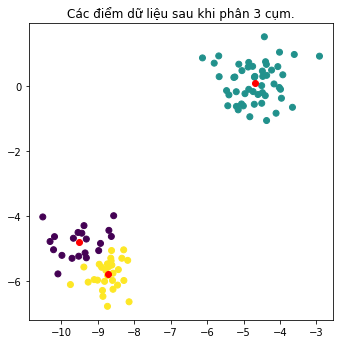

In [159]:

##### exercise #####
# Yêu cầu: Thử nghiệm trường hợp dữ liệu sinh ra chỉ có 2 cụm nhưng training kmean học tham số k = 3 cụm  
# Gợi ý: thay đổi tham số số cụm khi dựng model kmean 
#.       kết quả thu được phải ra được hình ảnh như bên dưới về số tâm cụm và phân bố cụm. 
######################
y_pred = k_mean_model.predict(X)
print("Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: \n")
print(y_pred[:5])

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title("Các điểm dữ liệu sau khi phân {} cụm.".format(k_cluster))
plt.show()

Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: 

[1 2 0 4 1]


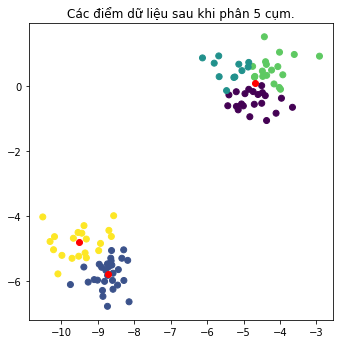

In [160]:
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)

k_cluster = 5
k_mean_model = KMeans(n_clusters=k_cluster, random_state=random_state)
k_mean_model.fit(X)
y_pred = k_mean_model.predict(X)
print("Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: \n")
print(y_pred[:5])

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title("Các điểm dữ liệu sau khi phân {} cụm.".format(k_cluster))
plt.show()

In [161]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from IPython.core.display import Image, display

/var/folders/gh/mtph8ts96vl9yhpn_5c9gn6r0000gn/T/ipykernel_1819/2555458203.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


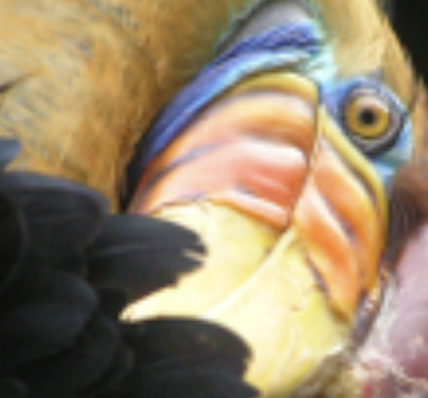

In [162]:
path_img = 'bird_small.png'
display(Image(path_img, width=250, unconfined=True))
img = io.imread(path_img)
    
data_img = (img / 255.0).reshape(-1,img.shape[2]) # chuyển ma trận 128x128x3 về mảng 2 chiều 
img_shape = img.shape     

(5, 4)


/var/folders/gh/mtph8ts96vl9yhpn_5c9gn6r0000gn/T/ipykernel_1819/208156172.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


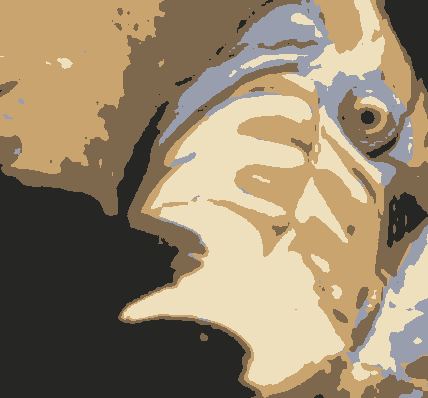

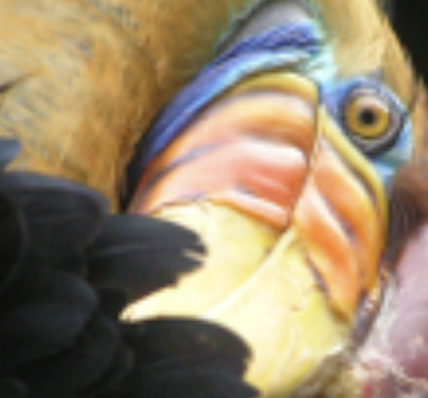

In [163]:
##### bài tập #####
# Yêu cầu: Nén ảnh trên thành ảnh có số màu < 5 và kiểm tra 
# Gợi ý: thay đổi tham số "số cụm" khi dựng model kmean 
######################


# model = None 
######################
n_colors = 5
k_mean_model = KMeans(n_clusters=n_colors)
k_mean_model.fit(data_img)

img128=k_mean_model.cluster_centers_[k_mean_model.labels_]

print(k_mean_model.cluster_centers_.shape)
# chuẩn hoá lại kích thước ảnh theo chiều dài, rộng ban đầu 
img128=np.reshape(img128, img_shape)
image.imsave('img128.png', img128)

from IPython.core.display import Image, display

#Save image
display(Image('img128.png', width=250, unconfined=True))
display(Image(path_img, width=250, unconfined=True))

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import math 

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [165]:
diabetes = datasets.load_diabetes()
print(diabetes.data)
# print(list(diabetes))
print(diabetes.target)
print(diabetes.feature_names)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [166]:
from sklearn.datasets import load_diabetes

diabetes_X = diabetes.data
diabetes_Y = diabetes.target

diabetes_X_train = diabetes_X[:-80]
diabetes_Y_train = diabetes.target[:-80]


diabetes_X_test = diabetes_X[-80:]
diabetes_Y_test = diabetes.target[-80:]




In [167]:
regr = linear_model.LinearRegression()
ridge_regr = linear_model.Ridge(alpha=0.5)
print(type(regr))


<class 'sklearn.linear_model._base.LinearRegression'>


In [168]:
regr.fit(diabetes_X_train, diabetes_Y_train)
print("[w1...wn] = ", regr.coef_)
print("w0 = ", regr.intercept_)

[w1...wn] =  [   3.92433306 -253.94783649  520.35362721  300.43342402 -603.61603253
  325.29239155   10.80046579  139.51667826  669.06893875  111.45531856]
w0 =  152.7301323963886


In [169]:
##### exercise #####
# Yêu cầu: tính giá trị dự đoán của mô hình trên mẫu đầu tiên của tập test
# Gợi ý: sử dụng công thức y = w0 + w1*x1 + w1*x2 + ... + w_n*x_n
######################
first_customer = diabetes.data[0]

y_pred_first = regr.intercept_

for i in range(len(first_customer)):
    y_pred_first += first_customer[i] * regr.coef_[i]

print("y predict = ", y_pred_first)
print("y target = ", diabetes.target[0])



y predict =  204.57450161685415
y target =  151.0


In [171]:
diabetes_y_pred = regr.predict(diabetes_X_test)
pd.DataFrame(data=np.array([diabetes_Y_test,diabetes_y_pred,abs(diabetes_Y_test-diabetes_y_pred)]).T,columns=["Test","Predict","Difference"])


,Test,Predict,Difference
0,321.0,234.908470,86.091530
1,58.0,163.457251,105.457251
2,262.0,163.571593,98.428407
3,206.0,167.786647,38.213353
4,233.0,254.212487,21.212487
...,...,...,...
75,178.0,191.809673,13.809673
76,104.0,104.520901,0.520901
77,132.0,123.523369,8.476631
78,220.0,209.999198,10.000802
